In [4]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=26181344a5e1fabd51f92bf2a90472de6b762362c3b971ebc2b42f2092992740
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
!apt -qq -y install fonts-nanum
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=500)

print("X={0},y={1}".format(np.shape(X),np.shape(y)))

X=(500, 1),y=(500,)


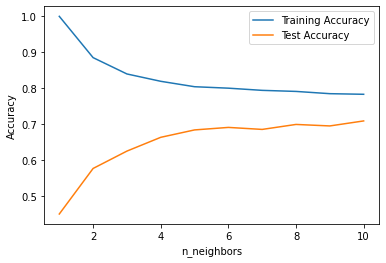

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
N=np.arange(0,10,1)

training_accuracy = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for k in neighbors_settings:
    # 모델 생성
    reg =  KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(reg.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend(loc=1)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


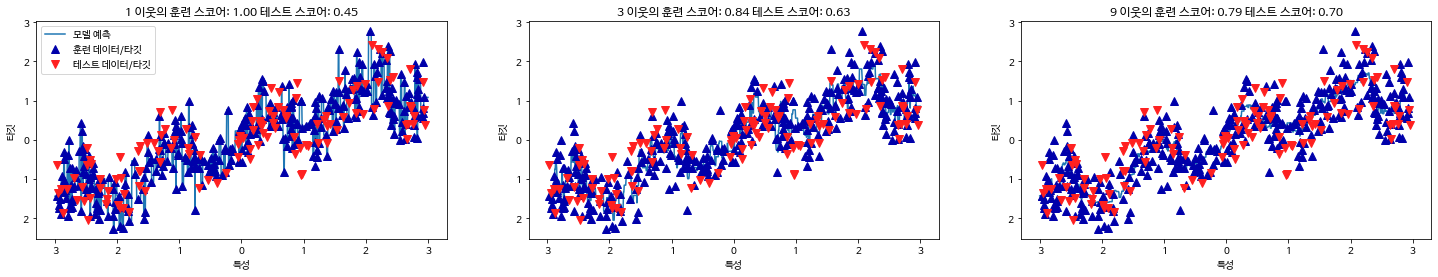

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) #axes가 그림파일 배열이라고 보면 되겠네

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000) # line이 1000개의 원소로 이루어진(1,1000)짜리 행렬인데
line_reshape=np.linspace(-3, 3, 1000).reshape(-1, 1) #(1000,1)짜리 행렬로 바꾸는작업
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for n_neighbors, ax in zip([1, 3, 9], axes): #n_neighbors는 [1,3,9]를 돌고 ax는 axes 이 그림 배열에 돌아서.
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line_reshape, reg.predict(line_reshape))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")


NameError: ignored